<a href="https://colab.research.google.com/github/veranoviani/-Case-Study---Customer-Segmentation/blob/main/Vera_Noviani_Case_Study_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Load Packages

In [1]:
#!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Install Data 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/superstore_dataset/global_superstore.csv")


# No 1 


  # a. Kategori barang seperti apa yang memiliki jumlah penjualan terbesar dan penyumbang profit terbesar? 

In [4]:
# cek data cleaning dari nilai profit
df1 = df[df['profit']>0]
df1

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
5,22732,IN-2013-42360,2013-06-28T00:00:00Z,2013-07-01T00:00:00Z,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.350,Critical
6,30570,IN-2011-81826,2011-11-07T00:00:00Z,2011-11-09T00:00:00Z,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.770,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,24175,IN-2014-57662,2014-08-05T00:00:00Z,2014-08-10T00:00:00Z,Standard Class,DB-13270,Deborah Brumfield,Home Office,Townsville,Queensland,...,OFF-BI-10002424,Office Supplies,Binders,"Avery Binder, Economy",58.050,5,0.1,19.9500,0.010,Medium
51285,29002,IN-2014-62366,2014-06-19T00:00:00Z,2014-06-19T00:00:00Z,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51287,40470,US-2013-155768,2013-12-02T00:00:00Z,2013-12-02T00:00:00Z,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18T00:00:00Z,2012-02-22T00:00:00Z,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [5]:
df1.groupby("category")["profit"].sum()


category
Furniture          655373.5635
Office Supplies    782455.7519
Technology         950274.1316
Name: profit, dtype: float64

In [6]:
#create DataFrame
df2 = pd.DataFrame({'count': [655373.5635 ,  782455.7519	,  950274.1316 ,   ]})
df2.index = ['Furniture', 'Office Supplies', 'Technology']

#sort DataFrame by count descending
df2 = df2.sort_values(by='count', ascending=False)

#add column to display cumulative percentage
df2['cumperc'] = df2['count'].cumsum()/df2['count'].sum()*100

#view DataFrame
df2

,count,cumperc
Technology,950274.1316,39.792000
Office Supplies,782455.7519,72.556735
Furniture,655373.5635,100.000000


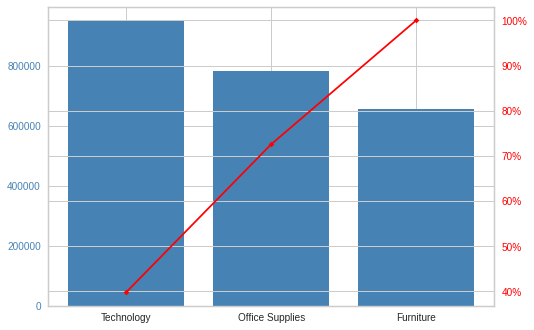

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df2.index, df2['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df2.index, df2['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari kategori barang di atas yang menyumbang profit terbesar adalah office supplies dan technology

   # b. Subkategori apa yang memiliki penjualan dan profit terbesar? 

In [8]:
df1.groupby("sub_category")["profit"].sum()

sub_category
Accessories    169483.8044
Appliances     205672.2798
Art             79614.5386
Binders        125333.9073
Bookcases      263370.7168
Chairs         236481.1644
Copiers        330115.0480
Envelopes       40464.6818
Fasteners       17798.7240
Furnishings     75481.9224
Labels          18771.2821
Machines       137540.6133
Paper           69507.1764
Phones         313134.6659
Storage        184525.4678
Supplies        40767.6941
Tables          80039.7599
Name: profit, dtype: float64

In [9]:
#create DataFrame
df4 = pd.DataFrame({'count': [ 169483.8044 ,205672.2798 , 79614.5386, 125333.9073 , 263370.7168 ,236481.1644 , 330115.0480 , 40464.6818 , 17798.7240 , 75481.9224,18771.2821,137540.6133 ,69507.1764 ,313134.6659 ,184525.4678 ,40767.6941,  80039.7599 ]})
df4.index = ['Accessories', 'Appliances', 'Art' , 'Binders' , 'Bookcases' , 'Chairs ' , 'Copiers' , 'Envelopes' , 'Fasteners' , 'Furnishings ' , 'Labels' , 'Machines' , 'Paper ' , 'Phones' , 'Storage' , 'Supplies ' , 'Tables ']

#sort DataFrame by count descending
df4 = df4.sort_values(by='count', ascending=False)

#add column to display cumulative percentage
df4['cumperc'] = df4['count'].cumsum()/df4['count'].sum()*100

#view DataFrame
df4

,count,cumperc
Copiers,330115.0480,13.823314
Phones,313134.6659,26.935588
Bookcases,263370.7168,37.964035
Chairs,236481.1644,47.866502
Appliances,205672.2798,56.478871
Storage,184525.4678,64.205734
Accessories,169483.8044,71.302738
Machines,137540.6133,77.062146
Binders,125333.9073,82.310407
Tables,80039.7599,85.662011


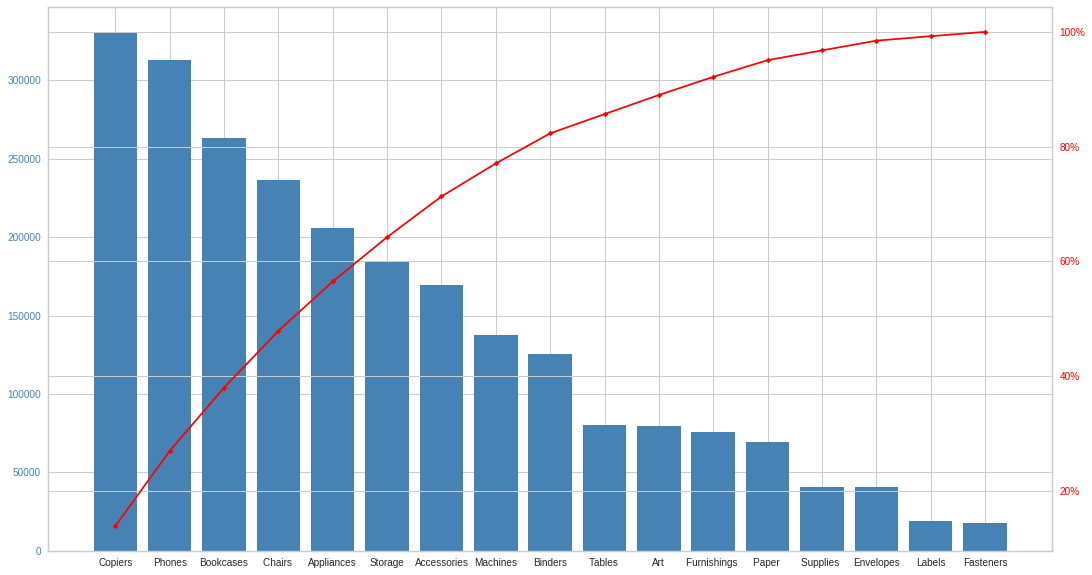

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(df4.index, df4['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df4.index, df4['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari sub kategori barang di atas yang menyumbang profit terbesar adalah machines , accessories , storage, appliances , chairs, bookcases , phones, copiers

  # c. Dari region manakah penyumbang profit terbesar? 

In [11]:
df1.groupby("region")["profit"].sum()

region
Africa            177746.66400
Canada             17817.39000
Caribbean          58831.24592
Central           513600.34854
Central Asia      162048.23800
EMEA              166963.88400
East              141113.38750
North             246732.79248
North Asia        191133.22200
Oceania           176062.29600
South             297590.51136
Southeast Asia    107324.05740
West              131139.40980
Name: profit, dtype: float64

In [12]:
#create DataFrame
df5 = pd.DataFrame({'count': [177746.66400 ,17817.39000, 58831.24592, 513600.34854, 162048.23800,  166963.88400 ,141113.38750 ,246732.79248 ,191133.22200 ,176062.29600 ,297590.51136 ,107324.05740,131139.40980]})
df5.index = ['Africa', 'Canada', 'Caribbean' , 'Central' , 'Central Asia' , 'EMEA ' , 'East' , 'North' , 'North Asia' , 'Oceania ' , 'South' , 'Southeast Asia' , 'West']

#sort DataFrame by count descending
df5 = df5.sort_values(by='count', ascending=False)
 
#add column to display cumulative percentage
df5['cumperc'] = df5['count'].cumsum()/df5['count'].sum()*100

#view DataFrame
df5

,count,cumperc
Central,513600.34854,21.506621
South,297590.51136,33.967995
North,246732.79248,44.299741
North Asia,191133.22200,52.303299
Africa,177746.66400,59.746304
Oceania,176062.29600,67.118777
EMEA,166963.88400,74.110262
Central Asia,162048.23800,80.895908
East,141113.38750,86.804922
West,131139.40980,92.296285


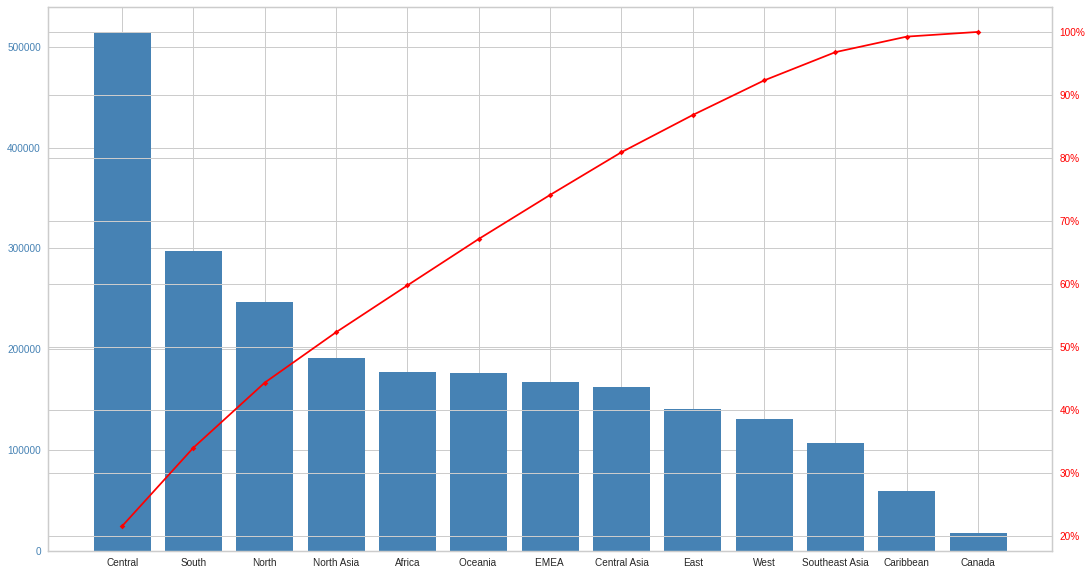

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(df5.index, df5['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df5.index, df5['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari data region di atas yang menyumbang profit terbesar adalah region central asia , emea, ocenia. africa, north asia, north , south , central

  # d. Kota mana saja penyumbang profit terbesar? 

In [14]:
df1.groupby("city")["profit"].sum()


city
Aachen                   1116.981
Aalen                     283.005
Aalst                     152.310
Abadan                    233.820
Abbeville                  19.710
                           ...   
Zurich                   3054.120
Zwedru                     11.850
Zwickau                    19.380
eMbalenhle                 13.620
Águas Lindas de Goiás      41.040
Name: profit, Length: 3243, dtype: float64

 # e.Kategori dan subkategori apa saja yang paling sering dibeli karena diskon? 

In [15]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [16]:
df6 = df[df["discount"]>0]

In [17]:
df6.groupby("category")["discount"].sum()

category
Furniture          1660.030
Office Supplies    4297.190
Technology         1372.508
Name: discount, dtype: float64

In [18]:
#create DataFrame
df7 = pd.DataFrame({'count': [1660.030 , 4297.190 , 1372.508]}) 
df7.index = ['Furniture' , 'Office Supplies', 'Technology']

#sort DataFrame by count descending
df7 = df7.sort_values(by='count', ascending=False)
 
#add column to display cumulative percentage
df7['cumperc'] = df7['count'].cumsum()/df7['count'].sum()*100

#view DataFrame
df7

,count,cumperc
Office Supplies,4297.190,58.626869
Furniture,1660.030,81.274776
Technology,1372.508,100.000000


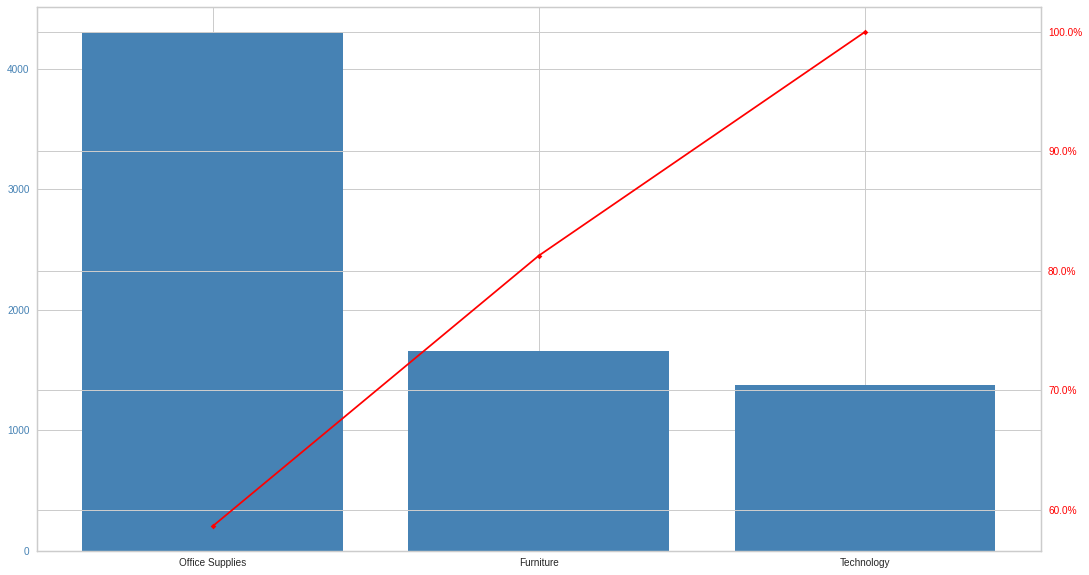

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(df7.index, df7['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df7.index, df7['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari kategori barang di atas yang paling sering dibeli karena diskon ialah furniture dan office supplies

In [20]:
df.groupby("sub_category")["discount"].sum()

sub_category
Accessories     370.480
Appliances      248.700
Art             573.080
Binders        1102.480
Bookcases       370.710
Chairs          560.120
Copiers         260.418
Envelopes       320.810
Fasteners       340.240
Furnishings     478.880
Labels          313.890
Machines        252.000
Paper           387.300
Phones          489.610
Storage         700.490
Supplies        310.200
Tables          250.320
Name: discount, dtype: float64

In [21]:
#create DataFrame
df8 = pd.DataFrame({'count': [370.480, 248.700 ,573.080, 1102.480 , 370.710 ,
                             560.120, 260.418, 320.810 , 340.240, 478.880, 313.890,
                             252.000,  387.300, 489.610, 700.490, 310.200,  250.320]}) 
df8.index = ['Accessories' ,'Appliances' ,'Art ' , 'Binders  ', 
            'Bookcases', 'Chairs ', 'Copiers', 'Envelopes ' , 'Fasteners', 'Furnishings',
            'Labels ' ,'Machines ' ,'Paper  ', 'Phones' , 'Storage' , 'Supplies' , 'Tables ']

#sort DataFrame by count descending
df8 = df8.sort_values(by='count', ascending=False)
 
#add column to display cumulative percentage
df8['cumperc'] = df8['count'].cumsum()/df8['count'].sum()*100

#view DataFrame
df8

,count,cumperc
Binders,1102.480,15.041213
Storage,700.490,24.598048
Art,573.080,32.416619
Chairs,560.120,40.058376
Phones,489.610,46.738160
Furnishings,478.880,53.271554
Paper,387.300,58.555515
Bookcases,370.710,63.613138
Accessories,370.480,68.667623
Fasteners,340.240,73.309542


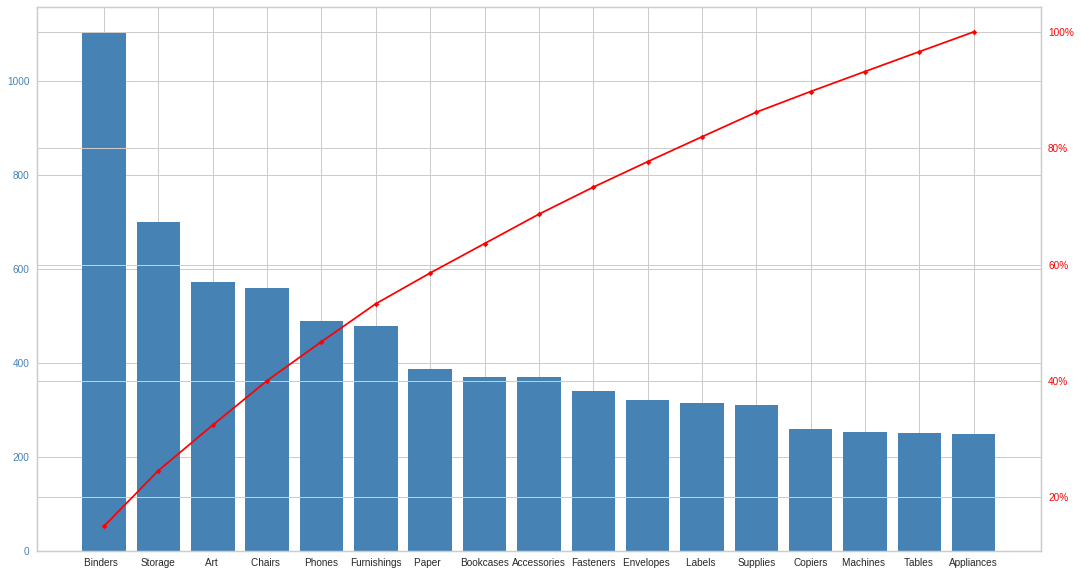

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(df8.index, df8['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df8.index, df8['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari sub kategori barang di atas yang paling sering dibeli karena diskon adalah envelopes, fasteners, accessories, paper, furnishings, phones, chairs, art, storage, binders



# No 2 Buatlah segmentasi RFM dan analisis segmentasi yang terbentuk. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

In [24]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


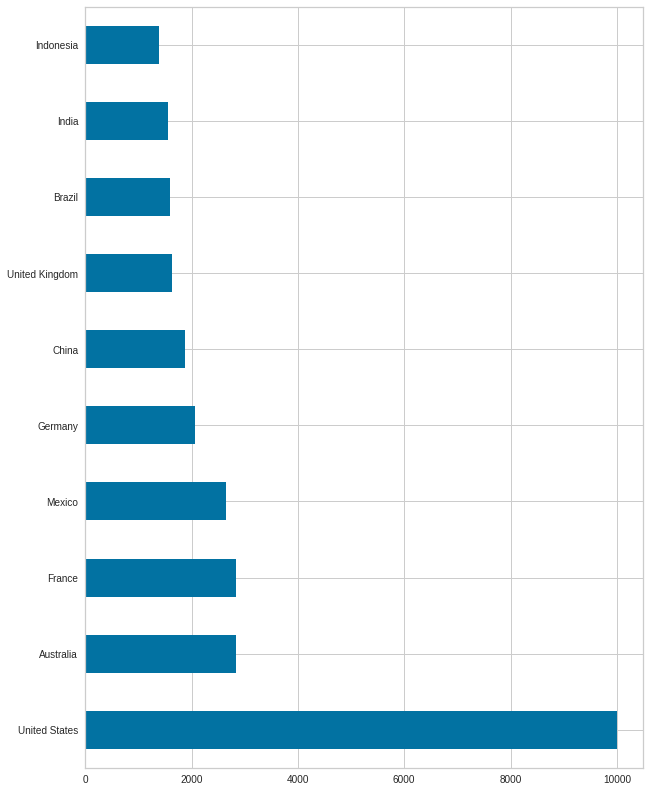

In [25]:
# create top country 
plt.figure(figsize=(10,14))
df['country'].value_counts()[:10].plot(kind='barh');

Dipilih country yang paling tinggi melakukan transaksi yaitu United States

In [26]:
raw_data = df.query('country == "United States"')

In [27]:
# cek data United States
raw_data.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
postal_code       0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 51287
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   order_date      9994 non-null   object 
 3   ship_date       9994 non-null   object 
 4   ship_mode       9994 non-null   object 
 5   customer_id     9994 non-null   object 
 6   customer_name   9994 non-null   object 
 7   segment         9994 non-null   object 
 8   city            9994 non-null   object 
 9   state           9994 non-null   object 
 10  country         9994 non-null   object 
 11  postal_code     9994 non-null   float64
 12  market          9994 non-null   object 
 13  region          9994 non-null   object 
 14  product_id      9994 non-null   object 
 15  category        9994 non-null   object 
 16  sub_category    9994 non-null   object 
 17  product_name    9994 non-null   

Create Order Date dan GMV.

GMV di ambil melalui quantity * (sales - (sales * discount)) + shopping cost

In [29]:
raw_data["order_date"] = pd.to_datetime(raw_data['order_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
raw_data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [31]:
raw_data['GMV_1'] = raw_data["quantity"]*(raw_data["sales"] - raw_data["discount"]*raw_data['sales'] +raw_data['shipping_cost'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Check Time Range

In [32]:
raw_data['order_date'].max()

Timestamp('2014-12-31 00:00:00+0000', tz='UTC')

Put maximum date as time for analysis

In [33]:
analysis_date = raw_data['order_date'].max()

Create data object for rfm modeling

In [82]:
data_for_model = raw_data.groupby(['customer_id'], as_index=False).agg({
        'order_date': lambda x: (analysis_date - x.max()).days,
        'order_id': 'count',
        'GMV_1': 'sum'})

In [83]:
data_for_model.rename(columns={'order_date': 'Recency',
                         'order_id': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [84]:
data_for_model = data_for_model[data_for_model['GMV_1'] > 0]

Check final data for customer segmentation

In [93]:
data_for_model.head()

,customer_id,Recency,Frequency,GMV_1
0,AA-10315,184,11,14224.26920
1,AA-10375,19,15,3156.99800
2,AA-10480,259,12,5902.09480
3,AA-10645,55,18,22695.82565
4,AB-10015,415,6,2131.54800


Dilihat berdasarkan data tersebut ada customer yang terakhir berkunjung 19 hari , 55 hari bahkan sampai ada yang 415 hari. Dengan berbeda-beda berapa kali mereka membeli product dan mengeluarkan biaya untuk belanja. 

Create RFM segmentation by using rfm_table_order function

In [38]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model['GMV_1'], q=4, labels = m_labels)

In [39]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [40]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [41]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

Check final result

In [42]:
data_for_model.head()

,customer_id,Recency,Frequency,GMV_1,R,F,M,rfm_score
0,AA-10315,184,11,14224.26920,1,2,3,123
1,AA-10375,19,15,3156.99800,4,3,1,431
2,AA-10480,259,12,5902.09480,1,2,2,122
3,AA-10645,55,18,22695.82565,3,4,4,344
4,AB-10015,415,6,2131.54800,1,1,1,111


Dilihat dari RFM score beberapa customer ada yang memiliki nilai kecil dalam jumlah berkunjung. rat-rata dalam melakukan pembelian barang kembali dan kecil dalam melakukan spend money.

Heatmap Visualization

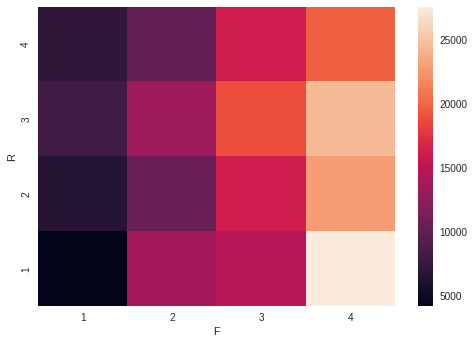

In [43]:
sns.heatmap(
    pd.pivot_table(data_for_model[["R", "F","GMV_1"]], values = "GMV_1", index = ["R"], columns = ["F"])
)

In [44]:
rfm_bar_data = data_for_model[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


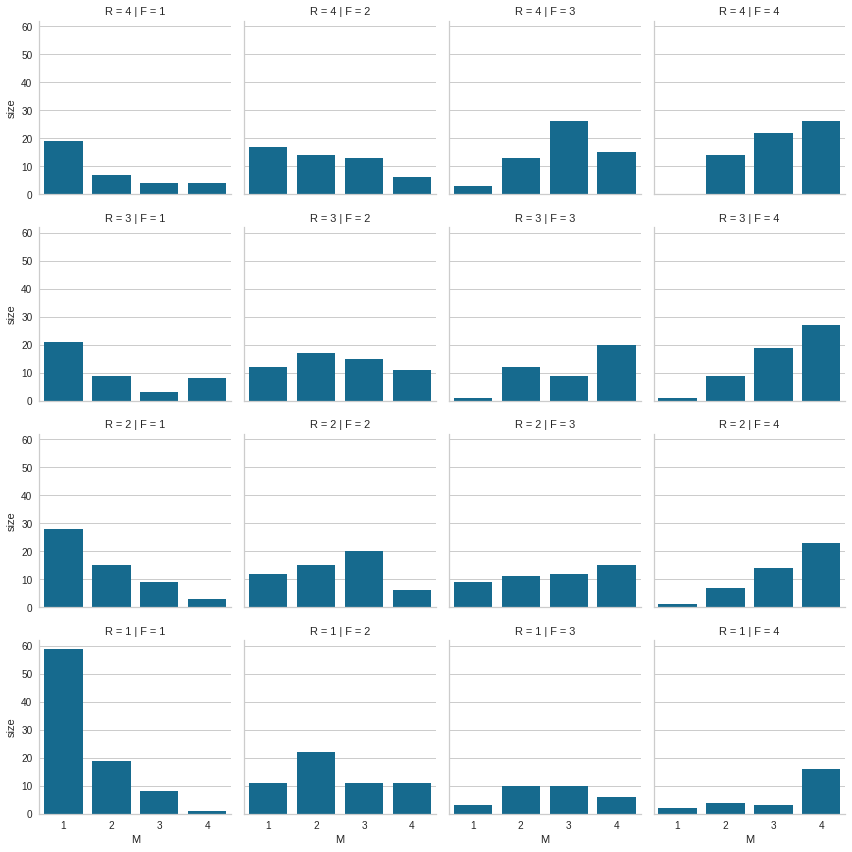

In [45]:
g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

Recency, Frequency, and GMV Distribution

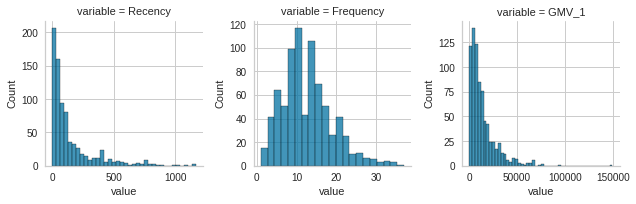

In [46]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV_1"]],
     value_vars=["Recency","Frequency", "GMV_1"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

Dimana di lihat dari grafik tersebut recency cenderung naik di awal-awal dan menurun di akhir.

dan frequency bergerak naik dan menurun tapi tetap ada pergerakan setiap kalinya

serta GMV naik ketika value pembelanjaan di bawah 50000 ketika melewati nilai value tersebut cenderung turun.

RFM Score to RFM Segment

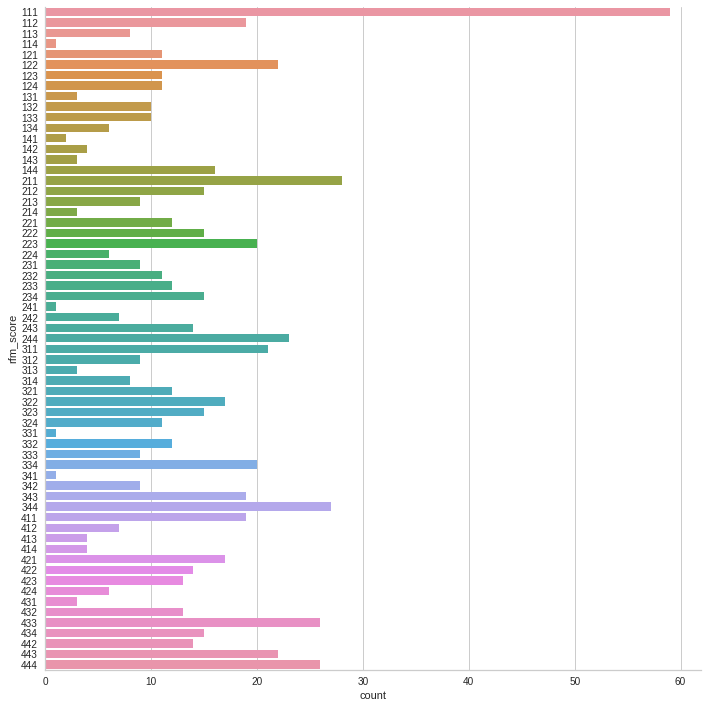

In [47]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [48]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444]),
     data_for_model['rfm_score'].isin([333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
     data_for_model['rfm_score'].isin([111])
    ],
    [
     'Champion',
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
     "Lost"
    ]
)

In [49]:
data_for_model

,customer_id,Recency,Frequency,GMV_1,R,F,M,rfm_score,rfm_segment
0,AA-10315,184,11,14224.26920,1,2,3,123,At Risk
1,AA-10375,19,15,3156.99800,4,3,1,431,Promising
2,AA-10480,259,12,5902.09480,1,2,2,122,At Risk
3,AA-10645,55,18,22695.82565,3,4,4,344,Loyal Customer
4,AB-10015,415,6,2131.54800,1,1,1,111,Lost
...,...,...,...,...,...,...,...,...,...
788,XP-21865,43,28,8653.23160,3,4,2,342,Promising
789,YC-21895,4,8,30875.45080,4,1,4,414,Promising
790,YS-21880,9,12,45073.79560,4,2,4,424,Promising
791,ZC-21910,54,31,37115.35990,3,4,4,344,Loyal Customer


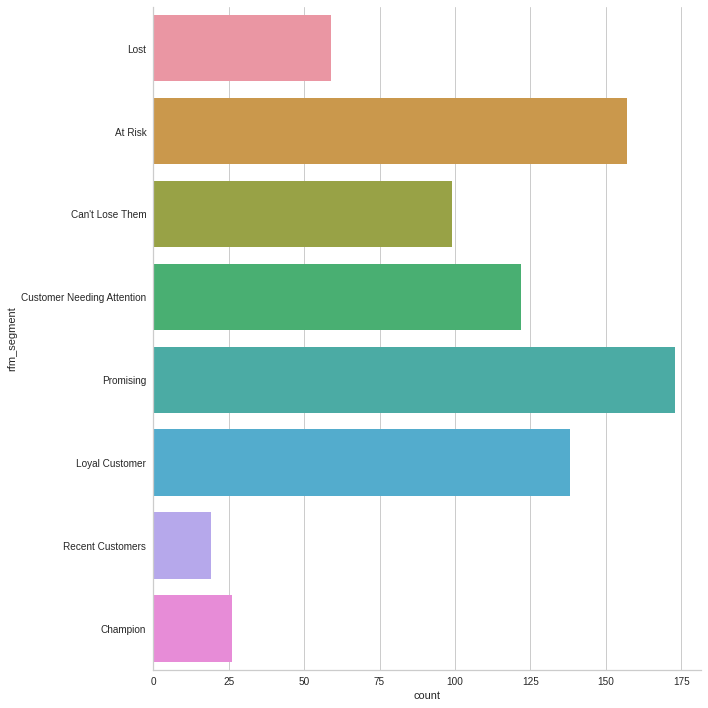

In [50]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

Dilihat dari hasil data tersebut menggunakan metode RFM Segmentation.

Bahwa negara United Stated cenderung pola customer yang berbelanja berkategori promosing. Dimana di lihat dari kecendrungan balik yang sangat lama dan pembelanjaan ulang yang cukup sedikit di tambah jumlah biaya di keluarkan juga cukup sedikit.

Yang berarti mereka lebih mencari barang-barang yang murah , dan mungkin melihat barang yang memiliki discount baru akan di beli dan mereka kembali berbelanja.

# No 3 Buatlah segmentasi menggunakan beberapa data yang ada lalu jelaskan mengapa anda menyarankan segmentasi tersebut dan apa aksi yang bisa kita lakukan terhadap segmentasi yang sudah dibuat!


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

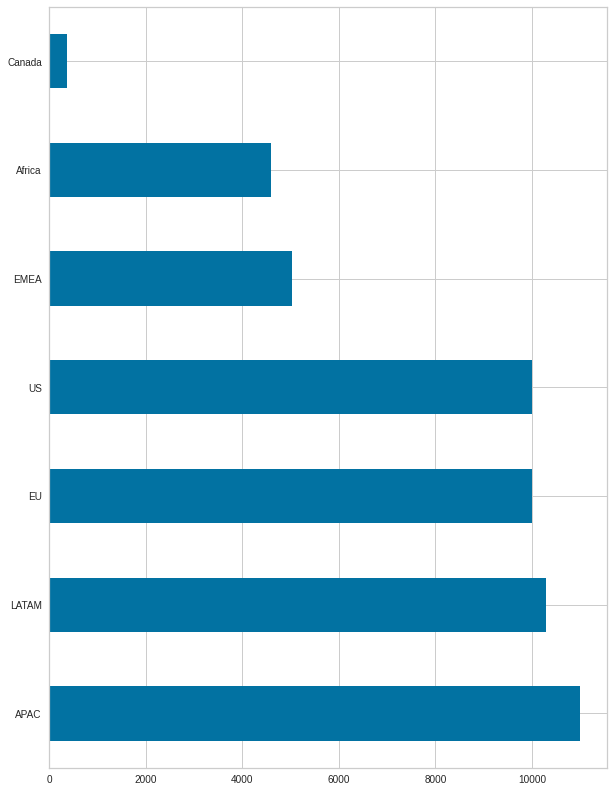

In [52]:
plt.figure(figsize=(10,14))
df['market'].value_counts()[:10].plot(kind='barh');

Di lihat dari segmentasi market bahwa market tertinggi terdapat di APAC. maka dari itu kita akan melihat bagaimana nilai RFM tersebut dari product yang mereka beli dan setiap mereka berbelanja.

In [53]:
raw_data2 = df.query('market == "APAC"')

In [54]:
raw_data2.isna().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       11002
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [55]:
raw_data2["order_date"] = pd.to_datetime(raw_data2['order_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
raw_data2['GMV'] = raw_data2["quantity"]*(raw_data2["sales"] - raw_data2["discount"]*raw_data2['sales'] +raw_data2['shipping_cost'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
#raw_data2['order_date'].max()

In [58]:
analysis_date = raw_data2['order_date'].max()
analysis_date

Timestamp('2014-12-31 00:00:00+0000', tz='UTC')

Create data rfm modelling

In [116]:
data_for_model = raw_data2.groupby(['product_id'], as_index=False).agg({
        'order_date': lambda x: (analysis_date - x.max()).days,
        'order_id': 'count',
      'GMV': 'sum'})
data_for_model

,product_id,order_date,order_id,GMV
0,FUR-BO-10000008,156,1,651.447200
1,FUR-BO-10000021,884,1,552.300000
2,FUR-BO-10000035,273,5,42265.141656
3,FUR-BO-10000071,221,8,8834.432500
4,FUR-BO-10000087,35,3,13202.110832
...,...,...,...,...
2718,TEC-PH-10004760,70,4,1897.416780
2719,TEC-PH-10004800,424,2,3051.992000
2720,TEC-PH-10004933,496,3,2172.993700
2721,TEC-PH-10004940,568,1,2523.200000


In [117]:
data_for_model.rename(columns={'order_date': 'Recency',
                         'order_id': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [119]:
data_for_model

,product_id,Recency,Frequency,GMV
0,FUR-BO-10000008,156,1,651.447200
1,FUR-BO-10000021,884,1,552.300000
2,FUR-BO-10000035,273,5,42265.141656
3,FUR-BO-10000071,221,8,8834.432500
4,FUR-BO-10000087,35,3,13202.110832
...,...,...,...,...
2718,TEC-PH-10004760,70,4,1897.416780
2719,TEC-PH-10004800,424,2,3051.992000
2720,TEC-PH-10004933,496,3,2172.993700
2721,TEC-PH-10004940,568,1,2523.200000


In [120]:
data_for_model = data_for_model[data_for_model['GMV'] > 0]

In [121]:
data_for_model.describe()

,Recency,Frequency,GMV
count,2723.000000,2723.000000,2723.000000
mean,297.552332,4.040397,6690.981874
std,330.724800,2.780056,13208.942037
min,0.000000,1.000000,2.128000
25%,57.000000,1.000000,544.841420
50%,158.000000,4.000000,1952.016350
75%,427.500000,6.000000,6569.629536
max,1458.000000,19.000000,178490.009500


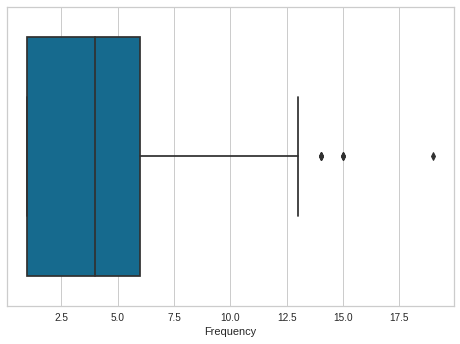

In [122]:
sns.boxplot(data=data_for_model,x="Frequency")

In [123]:
data_for_model['Recency']

0       156
1       884
2       273
3       221
4        35
       ... 
2718     70
2719    424
2720    496
2721    568
2722    144
Name: Recency, Length: 2723, dtype: int64

In [124]:
for i in range(4, 0, -1):
  print(i)

4
3
2
1


In [125]:
r_labels = range(4, 0, -1)
f_labels = range(1, 4)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels,duplicates="drop")
f_groups = pd.qcut(data_for_model['Frequency'], q=3, labels = f_labels,duplicates="drop")
m_groups = pd.qcut(data_for_model['GMV'], q=4, labels = m_labels)

In [126]:
f_groups.unique()

[1, 2, 3]
Categories (3, int64): [1 < 2 < 3]

In [127]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [128]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [129]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

In [130]:
data_for_model.head()

,product_id,Recency,Frequency,GMV,R,F,M,rfm_score
0,FUR-BO-10000008,156,1,651.447200,3,1,2,312
1,FUR-BO-10000021,884,1,552.300000,1,1,2,112
2,FUR-BO-10000035,273,5,42265.141656,2,2,4,224
3,FUR-BO-10000071,221,8,8834.432500,2,3,4,234
4,FUR-BO-10000087,35,3,13202.110832,4,2,4,424


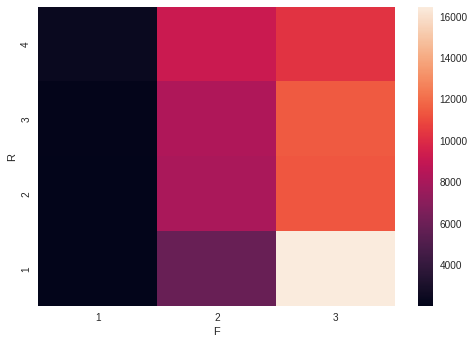

In [131]:
sns.heatmap(
    pd.pivot_table(data_for_model[["R", "F","GMV"]], values = "GMV", index = ["R"], columns = ["F"])
)

In [132]:
rfm_bar_data = data_for_model[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


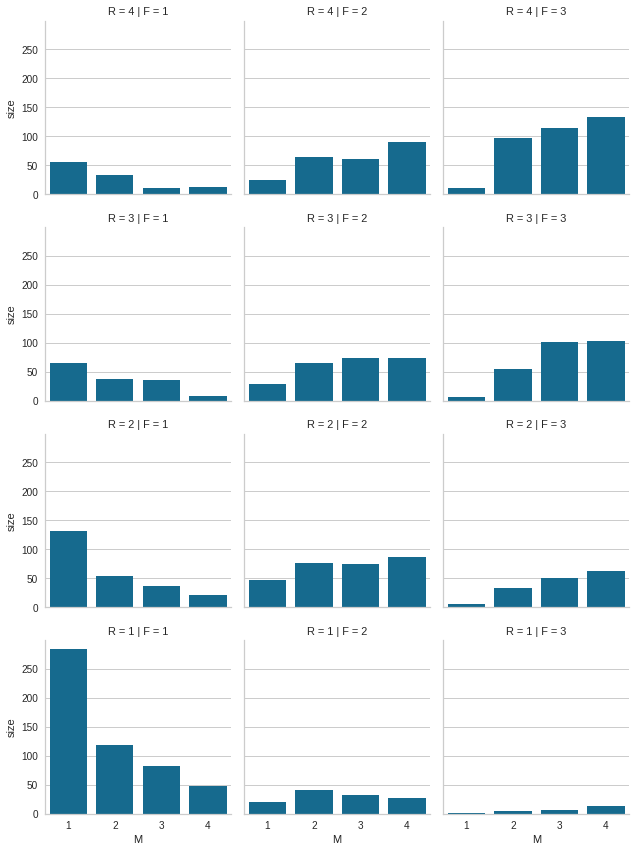

In [133]:
g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

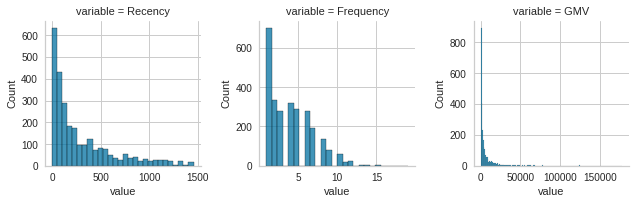

In [134]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

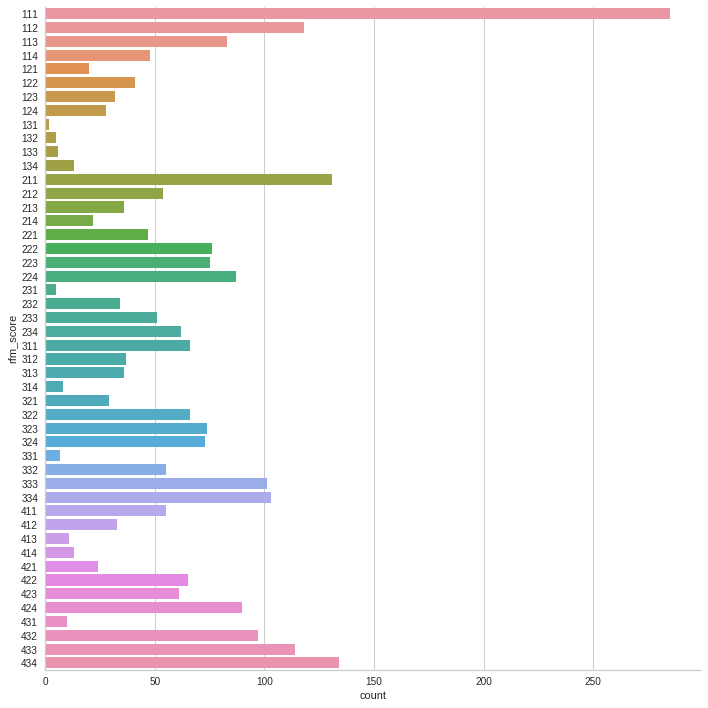

In [135]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [136]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444]),
     data_for_model['rfm_score'].isin([333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
     data_for_model['rfm_score'].isin([111])
    ],
    [
     'Champion',
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
     "Lost"
    ]
)

In [137]:
data_for_model

,product_id,Recency,Frequency,GMV,R,F,M,rfm_score,rfm_segment
0,FUR-BO-10000008,156,1,651.447200,3,1,2,312,Customer Needing Attention
1,FUR-BO-10000021,884,1,552.300000,1,1,2,112,At Risk
2,FUR-BO-10000035,273,5,42265.141656,2,2,4,224,Customer Needing Attention
3,FUR-BO-10000071,221,8,8834.432500,2,3,4,234,Can't Lose Them
4,FUR-BO-10000087,35,3,13202.110832,4,2,4,424,Promising
...,...,...,...,...,...,...,...,...,...
2718,TEC-PH-10004760,70,4,1897.416780,3,2,2,322,Promising
2719,TEC-PH-10004800,424,2,3051.992000,2,1,3,213,At Risk
2720,TEC-PH-10004933,496,3,2172.993700,1,2,3,123,At Risk
2721,TEC-PH-10004940,568,1,2523.200000,1,1,3,113,At Risk


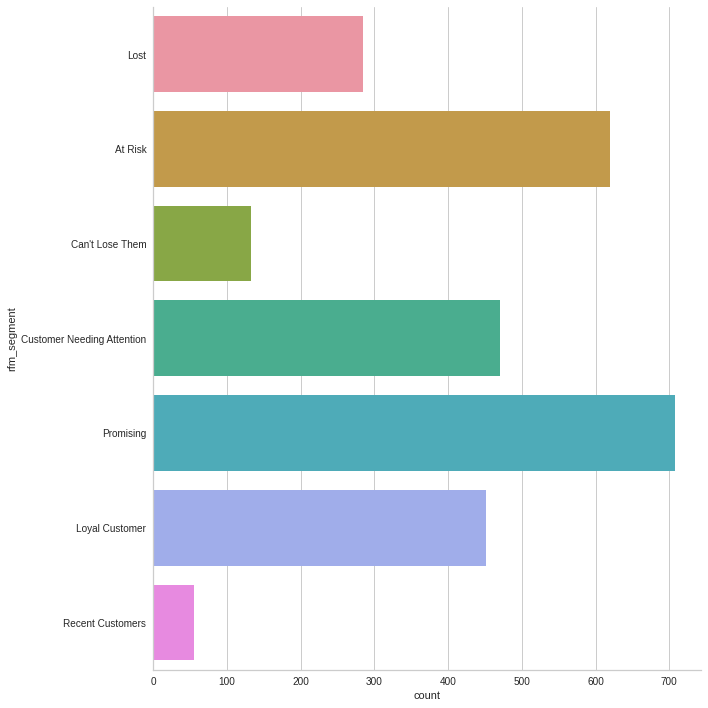

In [138]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

Dilihat dari hasil data tersebut menggunakan metode RFM Segmentation. Dimana kali ini kita melihat market terbesar berada di APAC 

Yang dimana kita ingin melihat seberapa seringkah mereka melakukan pembelanjaan dan berapa lama mereka akan kembali lagi untuk berbelanja kembali.

Dilihat berdasarkan product yang di beli market APAC cenderung memiliki pola customer yang berbelanja berkategori promosing. Dimana customer berkunjung kembali dalam waktu yang sangat lama dan membeli kembali dengan jumlah yang sedikit bahkan biaya yang dikeluarkan kebanyakan rata-rata.

Yang berarti kita perlu memberikan memberikan mereka penawaran product baru. yang dimana terlihat product-product yang di jual memiliki ketahanan barang untuk jangka panjang atau barang yang bukan merupakan kebutuhan sehari-hari. Jadi cukup lama  customer dapat berbelanja kembali untuk membeli product tersebut

Maka saran yang bisa di berikan adalah menawarkan barang yang cepat bisa di beli kembali , yang merupakan kebutuhan untuk waktu-waktu singkat. Agar rentang waktu mereka berkunjung tidak terlalu jauh dan membeli keperluan barang tersebut tidak sedikit.